In [1]:
import tensorflow as tf

print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))
print("GPU Devices:", tf.config.list_physical_devices('GPU'))



Num GPUs Available: 0
GPU Devices: []


In [2]:
import torch
print(torch.cuda.is_available())


True


In [3]:
import torch

print("Torch CUDA available:", torch.cuda.is_available())
print("Torch CUDA device count:", torch.cuda.device_count())
print("Torch CUDA current device:", torch.cuda.current_device() if torch.cuda.is_available() else "None")
print("Torch CUDA device name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "None")


Torch CUDA available: True
Torch CUDA device count: 1
Torch CUDA current device: 0
Torch CUDA device name: NVIDIA GeForce RTX 3050 Laptop GPU


In [18]:
import h5py

# Đường dẫn đến file HDF5
file_path = r'D:\STEP\Data EWalk\affectiveFeatures_2D.h5'

# Mở file HDF5
with h5py.File(file_path, 'r') as f:
    # Hàm đệ quy để in toàn bộ cấu trúc
    def print_structure(name, obj):
        if isinstance(obj, h5py.Dataset):
            print(f'Dataset: {name} - shape: {obj.shape}, dtype: {obj.dtype}')
        elif isinstance(obj, h5py.Group):
            print(f'Group: {name}')

    f.visititems(print_structure)


Dataset: VID_RGB_000.csv - shape: (29,), dtype: float64
Dataset: VID_RGB_001.csv - shape: (29,), dtype: float64
Dataset: VID_RGB_002.csv - shape: (29,), dtype: float64
Dataset: VID_RGB_003.csv - shape: (29,), dtype: float64
Dataset: VID_RGB_004.csv - shape: (29,), dtype: float64
Dataset: VID_RGB_005.csv - shape: (29,), dtype: float64
Dataset: VID_RGB_006.csv - shape: (29,), dtype: float64
Dataset: VID_RGB_007.csv - shape: (29,), dtype: float64
Dataset: VID_RGB_008.csv - shape: (29,), dtype: float64
Dataset: VID_RGB_009.csv - shape: (29,), dtype: float64
Dataset: VID_RGB_010.csv - shape: (29,), dtype: float64
Dataset: VID_RGB_011.csv - shape: (29,), dtype: float64
Dataset: VID_RGB_012.csv - shape: (29,), dtype: float64
Dataset: VID_RGB_013.csv - shape: (29,), dtype: float64
Dataset: VID_RGB_014.csv - shape: (29,), dtype: float64
Dataset: VID_RGB_015.csv - shape: (29,), dtype: float64
Dataset: VID_RGB_016.csv - shape: (29,), dtype: float64
Dataset: VID_RGB_017.csv - shape: (29,), dtype: 

In [15]:
import h5py

# Đường dẫn đến file HDF5
file_path = r'D:\STEP\Data_2D.h5'

# Mở file HDF5
with h5py.File(file_path, 'r') as f:
    # Hàm đệ quy để in toàn bộ cấu trúc
    def print_structure(name, obj):
        if isinstance(obj, h5py.Dataset):
            print(f'Dataset: {name} - shape: {obj.shape}, dtype: {obj.dtype}')
        elif isinstance(obj, h5py.Group):
            print(f'Group: {name}')

    f.visititems(print_structure)


Dataset: VID_RGB_000.csv - shape: (30, 48), dtype: float64
Dataset: VID_RGB_001.csv - shape: (30, 48), dtype: float64
Dataset: VID_RGB_002.csv - shape: (30, 48), dtype: float64
Dataset: VID_RGB_003.csv - shape: (30, 48), dtype: float64
Dataset: VID_RGB_004.csv - shape: (30, 48), dtype: float64
Dataset: VID_RGB_005.csv - shape: (30, 48), dtype: float64
Dataset: VID_RGB_006.csv - shape: (30, 48), dtype: float64
Dataset: VID_RGB_007.csv - shape: (30, 48), dtype: float64
Dataset: VID_RGB_008.csv - shape: (30, 48), dtype: float64
Dataset: VID_RGB_009.csv - shape: (30, 48), dtype: float64
Dataset: VID_RGB_010.csv - shape: (30, 48), dtype: float64
Dataset: VID_RGB_011.csv - shape: (30, 48), dtype: float64
Dataset: VID_RGB_012.csv - shape: (30, 48), dtype: float64
Dataset: VID_RGB_013.csv - shape: (30, 48), dtype: float64
Dataset: VID_RGB_014.csv - shape: (30, 48), dtype: float64
Dataset: VID_RGB_015.csv - shape: (30, 48), dtype: float64
Dataset: VID_RGB_016.csv - shape: (30, 48), dtype: float

In [14]:
import h5py
import numpy as np
import os

input_path = R'D:\STEP\Data EWalk\Data_2D.h5'         # <-- Đường dẫn tới file gốc
output_path = 'Data_2D.h5'     # <-- File mới sẽ được tạo
slice_len = 30
count = 0
with h5py.File(input_path, 'r') as infile, h5py.File(output_path, 'w') as outfile:
    for key in infile.keys():
        data = infile[key][()]  # data shape: (240, 48)

        # Kiểm tra độ dài chia hết
        total_frames = data.shape[0]
        num_slices = total_frames // slice_len  # 240 // 30 = 8

        for i in range(num_slices):
            start = i * slice_len
            end = start + slice_len
            sliced_data = data[start:end, :]  # shape (30, 48)

            # Tên mới: VIDEO_RGB_000_0, VIDEO_RGB_000_1, ...
            # new_key = f"{key[:-4]}_{i:02d}"  # loại bỏ .csv rồi thêm _i
            new_key = f"VID_RGB_{count:03d}.csv"  # 
            # print(f"Saving slice {new_key} with shape {sliced_data.shape} to {output_path}")
            outfile.create_dataset(new_key, data=sliced_data)
            count += 1

print("✅ Đã tách xong và lưu file mới:", output_path)


✅ Đã tách xong và lưu file mới: Data_2D.h5


In [2]:
from matplotlib import colors as mcolors
from matplotlib import pyplot as plt
from matplotlib import rcParams
import pandas as pd
import numpy as np
import os
# 2D
path1 = r'D:\PBL4\STEP\classifier_hybrid\Model_82\features_2D_my_82\accuracy.csv'
path2 = r'D:\PBL4\STEP\classifier_hybrid\Model_82\features_2D_82\accuracy.csv'
path3 = r'D:\PBL4\STEP\classifier_stgcn_real_only\model_73\features_2D_my_82\accuracy.csv'
path4 = r'D:\PBL4\STEP\classifier_stgcn_real_only\model_73\features_2D_82\accuracy.csv'
# 3D
path5 = r'D:\PBL4\STEP\classifier_hybrid\Model_82\features_3D_My_82\accuracy.csv'
path6 = r'D:\PBL4\STEP\classifier_hybrid\Model_82\features_3D_82\accuracy.csv'
path7 = r'D:\PBL4\STEP\classifier_stgcn_real_only\model_73\features_3D_my_82\accuracy.csv'
path8 = r'D:\PBL4\STEP\classifier_stgcn_real_only\model_73\features_3D_82\accuracy.csv'

df1 = pd.read_csv(path1)
accuracy1 = np.array(df1['accuracy'])
df2 = pd.read_csv(path2)
accuracy2 = np.array(df2['accuracy'])
df3 = pd.read_csv(path3)
accuracy3 = np.array(df3['accuracy'])
df4 = pd.read_csv(path4)
accuracy4 = np.array(df4['accuracy'])
df5 = pd.read_csv(path5)
accuracy5 = np.array(df5['accuracy'])
df6 = pd.read_csv(path6)
accuracy6 = np.array(df6['accuracy'])
df7 = pd.read_csv(path7)
accuracy7 = np.array(df7['accuracy'])
df8 = pd.read_csv(path8)
accuracy8 = np.array(df8['accuracy'])

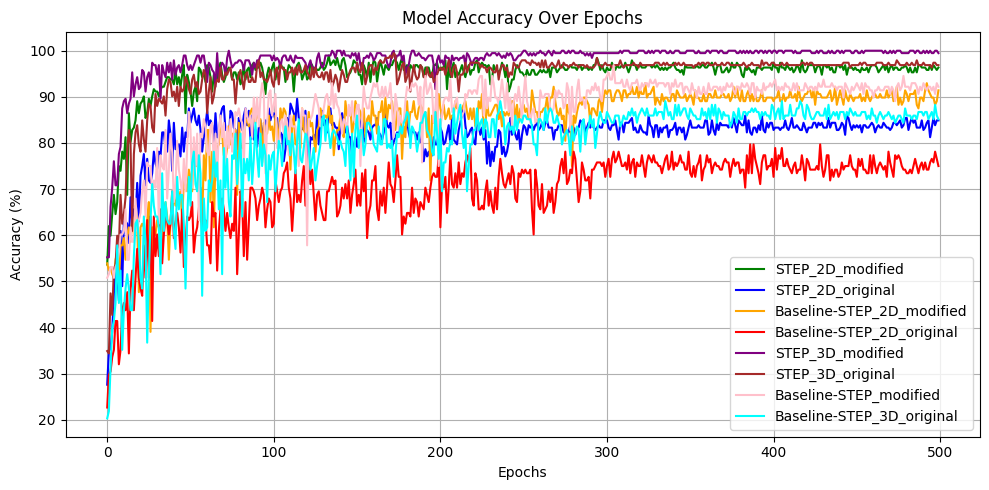

In [3]:
plt.figure(figsize=(10, 5))
plt.plot(accuracy1, label='STEP_2D_modified', color='green', marker='o', markersize=0, linestyle='-')
plt.plot(accuracy2, label='STEP_2D_original', color='blue', marker='o', markersize=0, linestyle='-')
plt.plot(accuracy3, label='Baseline-STEP_2D_modified', color='orange', marker='o', markersize=0, linestyle='-')
plt.plot(accuracy4, label='Baseline-STEP_2D_original', color='red', marker='o', markersize=0, linestyle='-')
plt.plot(accuracy5, label='STEP_3D_modified', color='purple', marker='o', markersize=0, linestyle='-')
plt.plot(accuracy6, label='STEP_3D_original', color='brown', marker='o', markersize=0, linestyle='-')
plt.plot(accuracy7, label='Baseline-STEP_modified', color='pink', marker='o', markersize=0, linestyle='-')
plt.plot(accuracy8, label='Baseline-STEP_3D_original', color='cyan', marker='o', markersize=0, linestyle='-')

# plt.xticks(np.arange(0, len(accuracy1), step=5))  
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy Over Epochs')
plt.legend()
plt.grid(True)
plt.tight_layout()
# Lưu hình
plt.savefig(os.path.join('accuracy_plot_all.png'))
plt.show()

In [4]:
from matplotlib import colors as mcolors
from matplotlib import pyplot as plt
from matplotlib import rcParams
import pandas as pd
import numpy as np
import os
# 2D
path1 = r'D:\PBL4\STEP\classifier_hybrid\Model_82\features_2D_my_82\train_accuracy.csv'
path2 = r'D:\PBL4\STEP\classifier_hybrid\Model_82\features_2D_82\train_accuracy.csv'
path3 = r'D:\PBL4\STEP\classifier_stgcn_real_only\model_73\features_2D_my_82\train_accuracy.csv'
path4 = r'D:\PBL4\STEP\classifier_stgcn_real_only\model_73\features_2D_82\train_accuracy.csv'
# 3D
path5 = r'D:\PBL4\STEP\classifier_hybrid\Model_82\features_3D_My_82\train_accuracy.csv'
path6 = r'D:\PBL4\STEP\classifier_hybrid\Model_82\features_3D_82\train_accuracy.csv'
path7 = r'D:\PBL4\STEP\classifier_stgcn_real_only\model_73\features_3D_my_82\train_accuracy.csv'
path8 = r'D:\PBL4\STEP\classifier_stgcn_real_only\model_73\features_3D_82\train_accuracy.csv'

df1 = pd.read_csv(path1)
accuracy1 = np.array(df1['accuracy'])
df2 = pd.read_csv(path2)
accuracy2 = np.array(df2['accuracy'])
df3 = pd.read_csv(path3)
accuracy3 = np.array(df3['accuracy'])
df4 = pd.read_csv(path4)
accuracy4 = np.array(df4['accuracy'])
df5 = pd.read_csv(path5)
accuracy5 = np.array(df5['accuracy'])
df6 = pd.read_csv(path6)
accuracy6 = np.array(df6['accuracy'])
df7 = pd.read_csv(path7)
accuracy7 = np.array(df7['accuracy'])
df8 = pd.read_csv(path8)
accuracy8 = np.array(df8['accuracy'])

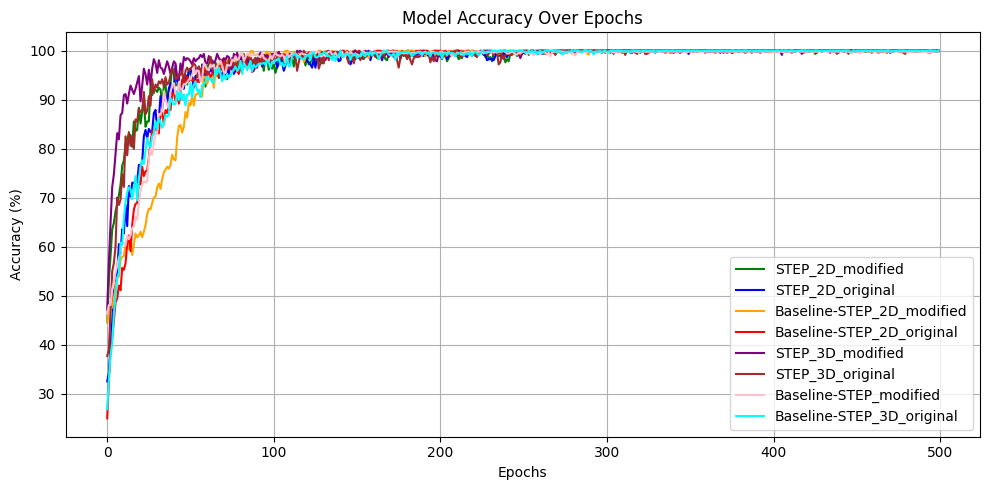

In [6]:
plt.figure(figsize=(10, 5))
plt.plot(accuracy1, label='STEP_2D_modified', color='green', marker='o', markersize=0, linestyle='-')
plt.plot(accuracy2, label='STEP_2D_original', color='blue', marker='o', markersize=0, linestyle='-')
plt.plot(accuracy3, label='Baseline-STEP_2D_modified', color='orange', marker='o', markersize=0, linestyle='-')
plt.plot(accuracy4, label='Baseline-STEP_2D_original', color='red', marker='o', markersize=0, linestyle='-')
plt.plot(accuracy5, label='STEP_3D_modified', color='purple', marker='o', markersize=0, linestyle='-')
plt.plot(accuracy6, label='STEP_3D_original', color='brown', marker='o', markersize=0, linestyle='-')
plt.plot(accuracy7, label='Baseline-STEP_modified', color='pink', marker='o', markersize=0, linestyle='-')
plt.plot(accuracy8, label='Baseline-STEP_3D_original', color='cyan', marker='o', markersize=0, linestyle='-')

# plt.xticks(np.arange(0, len(accuracy1), step=5))  
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy Over Epochs')
plt.legend()
plt.grid(True)
plt.tight_layout()
# Lưu hình
plt.savefig(os.path.join('accuracy_plot_all.png'))
plt.show()

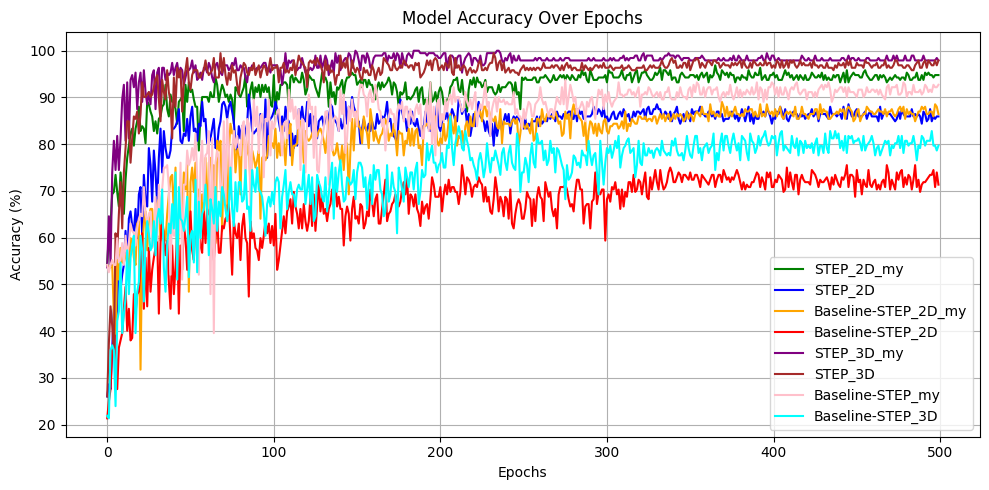

In [4]:
plt.figure(figsize=(10, 5))
plt.plot(accuracy1, label='STEP_2D_my', color='green', marker='o', markersize=0, linestyle='-')
plt.plot(accuracy2, label='STEP_2D', color='blue', marker='o', markersize=0, linestyle='-')
plt.plot(accuracy3, label='Baseline-STEP_2D_my', color='orange', marker='o', markersize=0, linestyle='-')
plt.plot(accuracy4, label='Baseline-STEP_2D', color='red', marker='o', markersize=0, linestyle='-')
plt.plot(accuracy5, label='STEP_3D_my', color='purple', marker='o', markersize=0, linestyle='-')
plt.plot(accuracy6, label='STEP_3D', color='brown', marker='o', markersize=0, linestyle='-')
plt.plot(accuracy7, label='Baseline-STEP_my', color='pink', marker='o', markersize=0, linestyle='-')
plt.plot(accuracy8, label='Baseline-STEP_3D', color='cyan', marker='o', markersize=0, linestyle='-')

# plt.xticks(np.arange(0, len(accuracy1), step=5))  
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy Over Epochs')
plt.legend()
plt.grid(True)
plt.tight_layout()
# Lưu hình
plt.savefig(os.path.join('accuracy_plot_all.png'))
plt.show()